## Instat Index Visszafejtő

A célunk, hogy az Instat Index minden komponensét és azok súlyozását visszafejtsük.

Jelenleg az Instat oldaláról a következőket tudjuk:

Az algoritmus figyelembe veszi a játékos hozzájárulását a csapat sikeréhez, cselekedeteik jelentőségét, az ellenfél szintjét és a bajnokság szintjét, amelyben játszanak. 
A besorolás automatikusan jön létre - minden paraméternek olyan tényezője van, amely a mérkőzés műveleteinek és eseményeinek számától függően változik. Minden pozícióhoz egyedi kulcsparaméterek vannak (12–14 tényező).

Forrás: https://instatsport.com/football/instat_index

### Milyen paramétereket és módszert használunk?

#### Lehetséges Paraméterek

Main statistics

- Matches played
- Minutes played
- Starting lineup appearances
- Substitute out
- Substitutes in
- Goals
- Assists
- Chances
- Chances successful
- Chances, % of conversion
- Сhances created
- Fouls
- Fouls suffered
- Offsides
- Yellow cards
- Red cards

Total actions

- Successful actions
- Successful actions, %
- Shots
- Shots on target
- Shots on target, %
- Shots wide
- Blocked shots
- Shots on post / bar
- Penalty
- Penalties scored
- Penalty kicks scored, %

Passes

- Passes
- Accurate passes
- Accurate passes, %
- Key passes
- Key passes accurate
- Key passes accuracy, %
- Crosses
- Crosses accurate
- Accurate crosses, %
- Ball losses and recoveries
- Lost balls
- Lost balls in own half
- Ball recoveries
- Ball recoveries in opponent's half


Challenges

- Challenges
- Challenges won
- Challenges won, %
- Defensive challenges
- Defensive challenges won
- Challenges in defence won, %
- Attacking challenges
- Attacking challanges won
- Challenges in attack / won, %
- Air challenges
- Air challenges won
- Air challenges won, %
- Dribbles
- Dribbles successful
- Successful dribbles, %
- Tackles
- Tackles successful
- Tackles won, %
- Ball interceptions
- Free ball pick ups

Others

- Passport
- Nationality
- Team
- National team
- Age
- Height
- Weight
- Foot
- National team (last match date, mm.yy)
- Youth national team (last match date, mm.yy)

#### Elemzési Módszer
##### Lineáris Regresszió

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/cdd9bf5610e1bdbbec2be5a0afa37ac214b0066e">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b47846936566c0b26b4006c201262d41778b1a29">

### Program

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from collections import Counter

In [127]:
basedata = pd.read_excel('NB1_CD.xls', index_col=0).replace('-',0).replace('.',',')

basedata

,InStat Index (total),Matches played (total),Minutes played (total),Starting lineup appearances (total),Substitute out (total),Substitutes in (total),Goals (total),Assists (total),Chances (total),Chances successful (total),...,Ball recoveries in opponent's half (total),Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy) (total)","Youth national team (last match date, mm.yy) (total)"
Anton Kravchenko,265,14,1332,14,0,0,2,2,4,2,...,10,Ukraine,Varda,0,29,190,84,right,0,0
Lasha Dvali,261,13,1133,12,1,1,0,0,6,1,...,4,Georgia,Ferencvaros,0,24,191,80,left,06.19,0
Kamen Hadzhiev,260,26,2342,26,0,0,0,0,4,0,...,45,Bulgaria,Puskas,0,28,188,0,left,10.19,0
Miha Blazic,259,38,3552,37,0,1,1,1,4,1,...,21,Slovenia,Ferencvaros,Slovenia,27,185,81,right,09.19,0
Leandro,256,8,263,4,3,4,2,0,3,2,...,7,"Hungary, Brazil",Ferencvaros,0,38,172,75,left,0,0
Dusan Brkovic,256,23,2116,23,0,0,4,0,8,4,...,26,Serbia,Diosgyor,0,31,182,80,right,0,0
Andrii Nesterov,255,19,1629,18,2,1,1,0,3,1,...,9,Ukraine,Mezokovesd-Zsor,0,29,191,89,right,0,0
Bence Batik,254,29,2582,28,2,0,1,1,9,1,...,21,Hungary,Honved,0,26,190,0,right,0,0
Roland Juhasz,254,23,2149,22,1,1,2,1,8,3,...,17,Hungary,Videoton,0,36,194,96,right,0,0
Paulo Vinicius,253,3,219,3,2,0,0,0,1,0,...,0,Brazil,Videoton,0,30,184,77,right,0,0


In [130]:
basedata['Successful actions, % (total)'] = basedata['Successful actions, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Chances, % of conversion (total)'] = basedata['Chances, % of conversion (total)'].apply(str).str.strip('%').astype(int)
basedata['Shots on target, % (total)'] = basedata['Shots on target, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Accurate passes, % (total)'] = basedata['Accurate passes, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Key passes accuracy, % (total)'] = basedata['Key passes accuracy, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Accurate crosses, % (total)'] = basedata['Accurate crosses, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Challenges won, % (total)'] = basedata['Challenges won, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Challenges in defence won, % (total)'] = basedata['Challenges in defence won, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Challenges in attack / won, % (total)'] = basedata['Challenges in attack / won, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Air challenges won, % (total)'] = basedata['Air challenges won, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Successful dribbles, % (total)'] = basedata['Successful dribbles, % (total)'].apply(str).str.strip('%').astype(int)
basedata['Tackles won, % (total)'] = basedata['Tackles won, % (total)'].apply(str).str.strip('%').astype(int)


In [131]:
basedata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Anton Kravchenko to Laszlo Ur
Data columns (total 71 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   InStat Index (total)                                  50 non-null     int64 
 1   Matches played (total)                                50 non-null     int64 
 2   Minutes played (total)                                50 non-null     int64 
 3   Starting lineup appearances (total)                   50 non-null     int64 
 4   Substitute out (total)                                50 non-null     int64 
 5   Substitutes in (total)                                50 non-null     int64 
 6   Goals (total)                                         50 non-null     int64 
 7   Assists (total)                                       50 non-null     int64 
 8   Chances (total)                                       5

In [132]:
basedata.describe()

,InStat Index (total),Matches played (total),Minutes played (total),Starting lineup appearances (total),Substitute out (total),Substitutes in (total),Goals (total),Assists (total),Chances (total),Chances successful (total),...,"Tackles won, % (total)",Ball interceptions (total),Free ball pick ups (total),Lost balls (total),Lost balls in own half (total),Ball recoveries (total),Ball recoveries in opponent's half (total),Age,Height,Weight
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,237.840000,18.380000,1579.840000,16.720000,1.180000,1.560000,0.860000,0.400000,3.46000,0.900000,...,64.180000,119.220000,121.700000,63.780000,19.540000,144.380000,13.980000,28.280000,187.120000,58.500000
std,17.240626,8.148845,782.340767,8.219042,1.172647,1.797504,0.989949,0.699854,2.54919,1.015191,...,10.508869,59.831154,64.527877,39.225299,12.246132,77.250953,10.450056,4.025632,4.415372,37.129256
min,199.000000,3.000000,219.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,33.000000,11.000000,23.000000,6.000000,3.000000,24.000000,0.000000,19.000000,172.000000,0.000000
25%,228.250000,12.250000,1005.000000,11.250000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,59.250000,68.500000,77.500000,34.500000,11.000000,91.500000,6.250000,25.000000,184.250000,0.000000
50%,240.000000,18.500000,1574.000000,16.500000,1.000000,1.000000,1.000000,0.000000,3.00000,1.000000,...,66.500000,114.500000,111.000000,55.000000,16.000000,137.000000,10.000000,28.500000,187.000000,79.500000
75%,252.000000,23.000000,2093.500000,22.000000,2.000000,2.000000,1.000000,1.000000,4.75000,1.000000,...,71.000000,166.750000,166.250000,85.500000,26.000000,195.750000,21.000000,31.000000,190.000000,82.000000
max,265.000000,38.000000,3552.000000,37.000000,5.000000,7.000000,4.000000,3.000000,9.00000,4.000000,...,89.000000,235.000000,266.000000,159.000000,49.000000,300.000000,45.000000,38.000000,198.000000,96.000000


In [137]:
data = basedata
data = data.drop(['Starting lineup appearances (total)', 'Substitute out (total)', 'Substitutes in (total)', 'Nationality', 'Team', 'National team ', 'Foot','National team (last match date, mm.yy) (total)', 'Youth national team (last match date, mm.yy) (total)'], axis=1)


data

,InStat Index (total),Matches played (total),Minutes played (total),Goals (total),Assists (total),Chances (total),Chances successful (total),"Chances, % of conversion (total)",Сhances created (total),Fouls (total),...,"Tackles won, % (total)",Ball interceptions (total),Free ball pick ups (total),Lost balls (total),Lost balls in own half (total),Ball recoveries (total),Ball recoveries in opponent's half (total),Age,Height,Weight
Anton Kravchenko,265,14,1332,2,2,4,2,50,6,14,...,71,123,116,39,8,140,10,29,190,84
Lasha Dvali,261,13,1133,0,0,6,1,17,5,6,...,76,85,79,27,10,89,4,24,191,80
Kamen Hadzhiev,260,26,2342,0,0,4,0,0,4,31,...,60,207,225,108,37,287,45,28,188,0
Miha Blazic,259,38,3552,1,1,4,1,25,8,37,...,63,219,257,159,44,296,21,27,185,81
Leandro,256,8,263,2,0,3,2,67,2,7,...,59,11,23,29,3,24,7,38,172,75
Dusan Brkovic,256,23,2116,4,0,8,4,50,7,23,...,72,163,167,73,20,205,26,31,182,80
Andrii Nesterov,255,19,1629,1,0,3,1,33,2,16,...,61,131,124,39,14,172,9,29,191,89
Bence Batik,254,29,2582,1,1,9,1,11,7,43,...,68,211,190,144,41,234,21,26,190,0
Roland Juhasz,254,23,2149,2,1,8,3,38,8,14,...,68,113,118,77,20,141,17,36,194,96
Paulo Vinicius,253,3,219,0,0,1,0,0,1,4,...,70,22,30,6,3,26,0,30,184,77


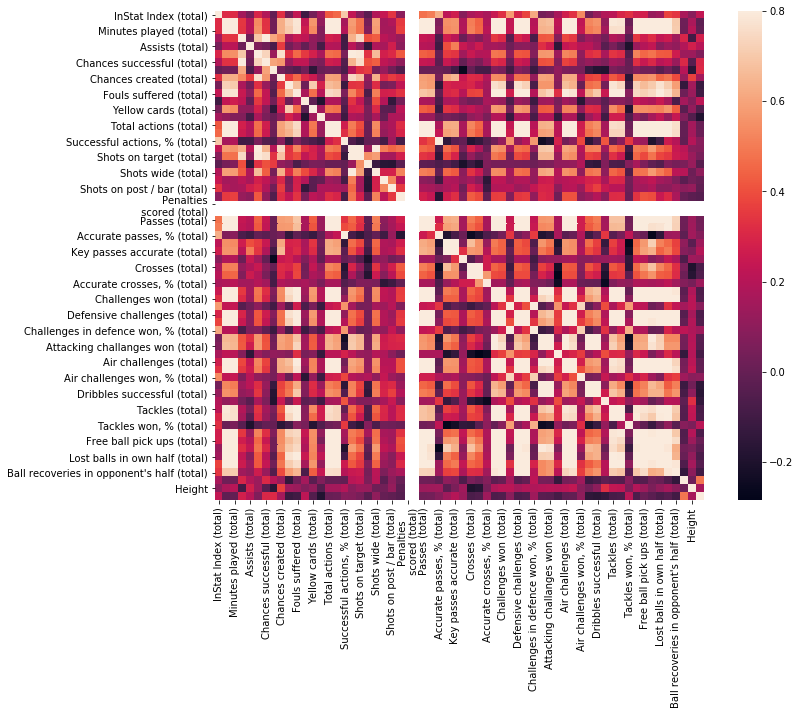

In [138]:
corrmatrix = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True);

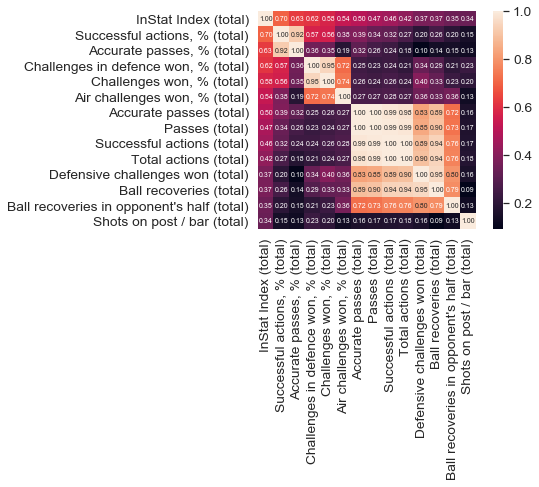

In [153]:
k = 14
cols = corrmatrix.nlargest(k, 'InStat Index (total)')['InStat Index (total)'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [155]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Instat index Korreláció NB1 CD pozíció']
most_corr

,Instat index Korreláció NB1 CD pozíció
0,InStat Index (total)
1,"Successful actions, % (total)"
2,"Accurate passes, % (total)"
3,"Challenges in defence won, % (total)"
4,"Challenges won, % (total)"
5,"Air challenges won, % (total)"
6,Accurate passes (total)
7,Passes (total)
8,Successful actions (total)
9,Total actions (total)
